In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
df = pd.read_pickle('https://github.com/Minoru938/CSPML/raw/refs/heads/master/CSPML_latest_codes/data_set/MP_stable_20211107.pd.xz')
df

,full_formula,composition,composition_ratio,total_atoms,elements,n_elements,space_group_num,space_group,wy_cfg,wy_reformat,...,point_group,pretty_formula,total_magnetization,volume,materials_id,cmpfgp,strfgp,comp_ratio,comp_ratio_label,ratio_class
id,,,,,,,,,,,,,,,,,,,,,
mp-1006278,Ac1Eu1Au2,"{'Ac': 1.0, 'Eu': 1.0, 'Au': 2.0}","(1.0, 1.0, 2.0)",4.0,"(Ac, Au, Eu)",3,225,Fm-3m,"{'Ac': {'b': 4}, 'Eu': {'a': 4}, 'Au': {'c': 8}}","{'Ac': ('b',), 'Eu': ('a',), 'Au': ('c',)}",...,m-3m,AcEuAu2,1.627705,117.080578,mp-1006278,"[2.771876949006818, 1.1865512400030185, 1.3736...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2, 1, 1]",2:1:1,2:1:1
mp-1017985,Ti2Ag2,"{'Ti': 2.0, 'Ag': 2.0}","(2.0, 2.0)",4.0,"(Ag, Ti)",2,129,P4/nmm,"{'Ti': {'c': 2}, 'Ag': {'c': 2}}","{'Ti': ('c',), 'Ag': ('c',)}",...,4/mmm,TiAg,0.000432,70.460966,mp-1017985,"[0.1350964788236539, -0.3146123122899018, 0.72...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1]",1:1,1:1
mp-1018128,Sc1Ag2,"{'Sc': 1.0, 'Ag': 2.0}","(1.0, 2.0)",3.0,"(Ag, Sc)",2,139,I4/mmm,"{'Sc': {'a': 2}, 'Ag': {'e': 4}}","{'Sc': ('a',), 'Ag': ('e',)}",...,4/mmm,ScAg2,0.003584,57.497334,mp-1018128,"[0.3701583036849434, -0.036045879905648566, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2, 1]",2:1,2:1
mp-1018131,Lu1Ag2,"{'Lu': 1.0, 'Ag': 2.0}","(1.0, 2.0)",3.0,"(Ag, Lu)",2,139,I4/mmm,"{'Lu': {'a': 2}, 'Ag': {'e': 4}}","{'Lu': ('a',), 'Ag': ('e',)}",...,4/mmm,LuAg2,0.004292,62.417938,mp-1018131,"[1.3921662378644646, 0.23220327720511438, 0.68...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2, 1]",2:1,2:1
mp-1025059,La2Ag4,"{'La': 2.0, 'Ag': 4.0}","(2.0, 4.0)",6.0,"(Ag, La)",2,74,Imma,"{'La': {'e': 4}, 'Ag': {'h': 8}}","{'La': ('e',), 'Ag': ('h',)}",...,mmm,LaAg2,0.000054,150.182757,mp-1025059,"[1.1060040162941984, 0.47981788376889506, 0.88...","[0.0007990796742680084, 0.0005650346563832462,...","[2, 1]",2:1,2:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mp-945077,Y2Te6,"{'Y': 2.0, 'Te': 6.0}","(2.0, 6.0)",8.0,"(Te, Y)",2,63,Cmcm,"{'Y': {'c': 4}, 'Te': {'c': 12}}","{'Y': ('c',), 'Te': ('c', 'c', 'c')}",...,mmm,YTe3,0.000283,245.997038,mp-945077,"[1.0089132625471442, 0.8615570688880563, 1.108...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3, 1]",3:1,3:1
mp-972256,Xe1,{'Xe': 1.0},"(1.0,)",1.0,"(Xe,)",1,166,R-3m,{'Xe': {'a': 1}},"{'Xe': ('a',)}",...,-3m,Xe,0.000000,85.786507,mp-972256,"[1.3308457618136933, -0.2091900591404454, 0.34...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1],1,1
mp-972364,Yb3,{'Yb': 3.0},"(3.0,)",3.0,"(Yb,)",1,166,R-3m,"{'Yb': {'a': 1, 'c': 2}}","{'Yb': ('a', 'c')}",...,-3m,Yb,0.000007,123.042457,mp-972364,"[2.3119733786260332, 2.6877147922959383, 2.253...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1],1,1


In [14]:
import json
with open('sg_nums.json', 'w') as f:
    json.dump( df.groupby('space_group_num').first()['space_group'].to_dict(), f)

In [8]:
sg_to_num = {
    sg: num
    for i, (sg, num) in pd.unique(df[['space_group_num', 'space_group']].values.tolist())
}

sg_to_num

/tmp/ipykernel_3074223/3761489386.py:3: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for i, (sg, num) in pd.unique(df[['space_group_num', 'space_group']].values.tolist())


TypeError: unhashable type: 'list'

In [3]:
df['strfgp']

id
mp-1006278    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-1017985    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-1018128    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-1018131    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-1025059    [0.0007990796742680084, 0.0005650346563832462,...
                                    ...                        
mp-945077     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-972256     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-972364     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-977585     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-9948       [0.019139984879094088, 0.021399153638986236, 0...
Name: strfgp, Length: 33064, dtype: object

In [55]:
common_ratios = df.query('total_atoms <= 20 and ratio_class != "others"')['ratio_class'].value_counts().head(20)
common_ratios

ratio_class
2:1:1      3751
1:1:1      2101
2:2:1      1392
2:1        1053
3:1         958
1:1         922
3:1:1       884
6:2:1:1     852
4:1:1       548
4:2:1       476
3:2:1       447
6:2:1       423
4:2:1:1     220
3:2         212
6:1:1       211
6:3:1       181
4:3:1       170
2:1:1:1     158
5:3:1       157
5:3         149
Name: count, dtype: int64

5.25% 6.51% 7.47%


<Axes: >

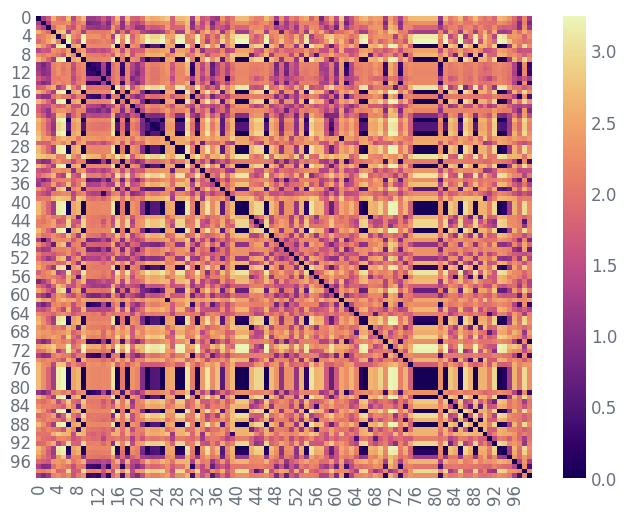

In [56]:
df_ratio = df.query('comp_ratio_label == "3:1:1"')
subset = df_ratio.sample(100, random_state=43)

Y = np.array(list(subset['strfgp']))

from scipy.spatial.distance import pdist, squareform

dists = pdist(Y, 'euclidean')
print(' '.join([f'{np.mean(dists < tau):.2%}' for tau in [0.1, 0.2, 0.3]]))
sns.heatmap(squareform(dists), cmap='rho_heatmap_r')

In [120]:
df.query('pretty_formula == "MgAl2O4"')

,full_formula,composition,composition_ratio,total_atoms,elements,n_elements,space_group_num,space_group,wy_cfg,wy_reformat,...,point_group,pretty_formula,total_magnetization,volume,materials_id,cmpfgp,strfgp,comp_ratio,comp_ratio_label,ratio_class
id,,,,,,,,,,,,,,,,,,,,,
mp-3536,Mg2Al4O8,"{'Mg': 2.0, 'Al': 4.0, 'O': 8.0}","(2.0, 4.0, 8.0)",14.0,"(Al, Mg, O)",3,227,Fd-3m,"{'Mg': {'a': 8}, 'Al': {'d': 16}, 'O': {'e': 32}}","{'Mg': ('a',), 'Al': ('d',), 'O': ('e',)}",...,m-3m,MgAl2O4,0.000052,136.371377,mp-3536,"[-1.3672551844202416, -0.2057885115707316, -1....","[0.0004013158700577757, 0.0003475497384118885,...","[4, 2, 1]",4:2:1,4:2:1


In [121]:
from tqdm import tqdm
rng = np.random.default_rng(1234)
pdist_batch_size = 0

dataset = []
for ratio in tqdm(common_ratios.index[::-1]):
    df_ratio: pd.DataFrame = df.query('comp_ratio_label == @ratio').reset_index()
    
    if pdist_batch_size == 0 or pdist_batch_size >= len(df_ratio.index):
        groups = [np.arange(len(df_ratio.index))]
    else:
        groups = np.array_split(rng.permutation(df_ratio.shape[0]), pdist_batch_size)
    for group in groups:
        subset = df_ratio.iloc[group]
        Y = np.array(list(subset['strfgp']))
        dists = pdist(Y, 'euclidean')
        dm = squareform(dists)
        ii, jj = np.triu_indices_from(dm, k=1)
        cols = ['id', 'full_formula', 'space_group']
        data_dict = {'ratio': [ratio for _ in ii], 'dist': dm[(ii, jj)]}
        for inds, suff in zip((ii, jj), ('_1', '_2')):
            for col in cols:
                data_dict[col + suff] = subset.iloc[inds][col].values

        dataset.append(pd.DataFrame(data_dict))

data_df = pd.concat(dataset).reset_index(drop=True)
for col in ('ratio', 'id_1', 'full_formula_1', 'space_group_1', 'id_2', 'full_formula_2', 'space_group_2'):
    data_df[col] = data_df[col].astype('category')

100%|██████████| 20/20 [00:32<00:00,  1.63s/it]


In [107]:
data_df

,ratio,dist,id_1,pretty_formula_1,space_group_1,id_2,pretty_formula_2,space_group_2
0,5:3,0.075454,mp-31172,Ca5Ag3,I4/mcm,mp-571212,Yb5Ag3,I4/mcm
1,5:3,2.008706,mp-31172,Ca5Ag3,I4/mcm,mp-1501,Al3Pt5,Pbam
2,5:3,2.300419,mp-31172,Ca5Ag3,I4/mcm,mp-16514,Al3Ni5,Cmmm
3,5:3,1.506156,mp-31172,Ca5Ag3,I4/mcm,mp-10047,Ca5As3,P6_3/mcm
4,5:3,1.428876,mp-31172,Ca5Ag3,I4/mcm,mp-1106024,Eu5As3,P6_3/mcm
...,...,...,...,...,...,...,...,...
15063717,2:1:1,0.061459,mp-999137,SmTlSe2,R-3m,mp-1065514,YTlTe2,R-3m
15063718,2:1:1,2.728159,mp-999137,SmTlSe2,R-3m,mp-1187870,YTmTl2,Fm-3m
15063719,2:1:1,0.122831,mp-1008561,TmTlTe2,R-3m,mp-1065514,YTlTe2,R-3m
15063720,2:1:1,2.711075,mp-1008561,TmTlTe2,R-3m,mp-1187870,YTmTl2,Fm-3m


<Axes: xlabel='dist', ylabel='Proportion'>

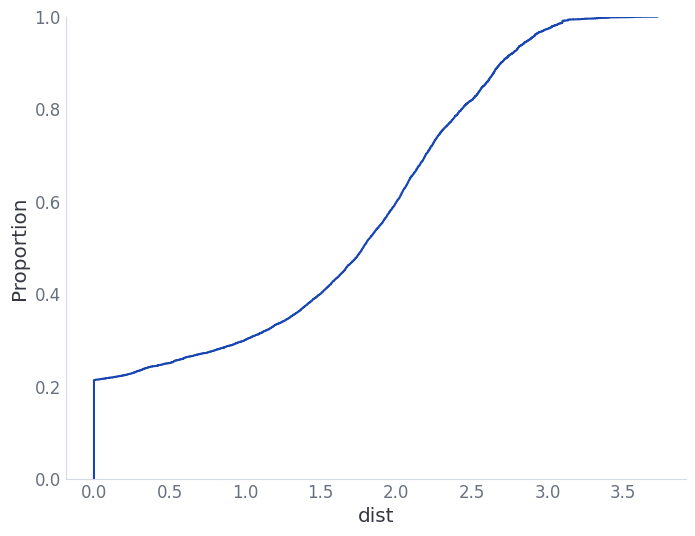

In [116]:
sns.ecdfplot(data_df.sample(10_000), x='dist')

In [110]:
data_df.query('dist < 0.01')

,ratio,dist,id_1,pretty_formula_1,space_group_1,id_2,pretty_formula_2,space_group_2
9040,5:3,8.240815e-03,mp-1201760,Er5Ir3,P4/ncc,mp-1197997,Ho5Ir3,P4/ncc
13158,5:3,1.739648e-03,mp-17751,Y5Ge3,P6_3/mcm,mp-2610,Tb5Ge3,P6_3/mcm
18632,5:3,1.704269e-03,mp-206,Tb5Si3,P6_3/mcm,mp-2538,Y5Si3,P6_3/mcm
34022,5:3:1,8.134072e-03,mp-1105603,Lu5Ge3C,P6_3/mcm,mp-1105990,Ho5Ge3C,P6_3/mcm
44255,5:3:1,8.732293e-03,mp-31469,Hf5CuSn3,P6_3/mcm,mp-1189448,Zr5GaPb3,P6_3/mcm
...,...,...,...,...,...,...,...,...
15063687,2:1:1,2.775558e-16,mp-978564,SmYTl2,Fm-3m,mp-978975,TbYTl2,Fm-3m
15063693,2:1:1,3.260542e-16,mp-978564,SmYTl2,Fm-3m,mp-1187870,YTmTl2,Fm-3m
15063694,2:1:1,2.837777e-16,mp-978815,Sm2TlZn,Fm-3m,mp-978975,TbYTl2,Fm-3m
15063700,2:1:1,1.608102e-17,mp-978815,Sm2TlZn,Fm-3m,mp-1187870,YTmTl2,Fm-3m


In [115]:
data_df.to_feather('pairs_data.feather')